In [725]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import OrderedDict
import seaborn as sns
import os
import sys
from datetime import datetime, timedelta, date

#sns.set(style="whitegrid", context="talk")
sns.set(style="whitegrid")
sns.set_color_codes("dark")

#GREY = '#ABB2B9'
#GREEN = '#4CAF50'
#BLUE = '#1565C0'
#AMBER = '#FF9800'
#RED = '#D32F2F'

GREY = '#9B9B9B'
GREEN = '#06C454'
BLUE = '#2E50FB'
AMBER = '#FFC300'
RED = '#D32F2F'

PCA_COMPLIANCE = {
    'NON-COMPLIANT':5, 
    'NON-COMPLIANT ':5, 
    'NON-COMPLIANT f':5, 
    'NON-COMPLIANT(F)':5, 
    'PARTIALLY COMPLIANT':4, 
    'PARTIALLY COMPLIANT ':4, 
    'PARTIALLY COMPLIANT f':4,
    'PARTIALLY COMPLIANT(F)':4,
    'FULLY COMPLIANT':3,
    'FULLY COMPLIANT ':3,
    'FULLY COMPLIANT f':3,
    'TRANSFER':2,
    'RESOLVED':2,
    'N/A':1
}

PCA_COMPLIANCE_INVERSE = {
    5:'NON-COMPLIANT', 
    4:'PARTIALLY COMPLIANT', 
    3:'FULLY COMPLIANT',
    2:'RESOLVED',
    1:'N/A'
}


SCA_COMPLIANCE = {
    '0 - n/a':0,
    '1 - Very Inadequate / Major Non-Conformity':1,
    '2 - Inadequate / Minor Non-Conformity (high severity)':2,
    '3 - Partially adequate / Minor Non-Conformity (low severity)':3,
    '4 - Broadly adequate / Observation':4,
    '5 - Substantially adequate / Compliant':5
}

SCA_COMPLIANCE_INVERSE = {
    0:'0 - n/a',
    1:'1 - Very Inadequate / Major Non-Conformity',
    2:'2 - Inadequate / Minor Non-Conformity (high severity)',
    3:'3 - Partially adequate / Minor Non-Conformity (low severity)',
    4:'4 - Broadly adequate / Observation',
    5:'5 - Substantially adequate / Compliant'
}

today = datetime.now().strftime('%d-%m-%Y')
week_num = datetime.today().strftime('%Y Week %W')

week = datetime.today().strftime('%W')

default_date_v = date(2018,10,31)
default_date_h = date(2018,5,25)

print default_date_v.strftime('%d/%m/%Y')

31/10/2018


# Reporting Notes
- We need to show a heatmap of the current snapshot
- Heatmap needed for PCA DPIA view i.e 1 , 2 .. 80
- Heatmap needed for PCA Cookbook view i.e. 1H, 2H, 7V .. 80V
- Heatmap per practice for the above heatmaps
- Project code heatmap
- Project reject heatmap

In [726]:
ls

All_REMEDIATION_STATS.xlsx
Archive Output/
Archive Responses/
Baseline-Per-Practice-Heatmap30-04-2018.png
burndown first baseline.xlsx
burndown.xlsx
compliancy_heatmap_28-04-2018.png
compliancy_heatmap_29-04-2018.png
compliancy_heatmap_30-04-2018.png
Compliancy-Heatmap.ipynb
Convert-RS-2.2.ipynb
Convert-RS-3.0.ipynb
Convert-RS-4.ipynb
dump.xlsx
Error Files/
GDPR-SNAPSHOT-28-04-2018.xlsx
GDPR-SNAPSHOT-30-04-2018.xlsx
heatmap_baseline/
HV-Breakdown-Compliancy-Heatmap30-04-2018.png
HV-Breakdown-Per-Practice-Heatmap30-04-2018.png
old_output_rs/
old RS versions/
output_rs/
output_rs (copy)/
PCA-ComliancyCount-30-04-2018.png
PCA-Compliancy-Heatmap30-04-2018.png
PCA_HEATMAP.xlsx
PCA-ProjectCodeStatus-30-04-2018.png
PCA-Responses-30-04-2018.png
Per-Practice-Heatmap30-04-2018.png
README.md
REMEDIATION_STATS.xlsx
Reports/
RS_FEEDBACK/
RS_responses/
RS_responses (copy)/
Transfer-RS-Responses.ipynb
Transfer-RS-Responses-V2.ipynb


In [727]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback'

In [728]:
pca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-27-04-2018.xlsx', na_values=[""], keep_default_na=False)
sca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-27-04-2018.xlsx', na_values=[""], keep_default_na=False)
#pca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-Week18-02-05-2018.xlsx', na_values=[""], keep_default_na=False)
#sca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-Week18-02-05-2018.xlsx', na_values=[""], keep_default_na=False)



In [729]:
#OUTPUT_BASE_DIR = './Reports/'+week_num
OUTPUT_BASE_DIR = './Reports/Test'

if not os.path.exists(OUTPUT_BASE_DIR):
    os.mkdir(OUTPUT_BASE_DIR)

In [730]:
ll heatmap_baseline

total 548
-rw-rw-r-- 1 andy 241198 Apr 30 08:44 EPS_PCA_Heatmap_26 Apr18_1.xlsx
-rw-rw-r-- 1 andy  26188 Apr 30 08:54 EPS_PCA_Heatmap_26 Apr18_v2.xlsx
-rw-rw-r-- 1 andy  25123 May  1 11:31 EPS_PCA_Heatmap_27 Apr18_v2.xlsx
-rw-rw-r-- 1 andy  25056 May  2 14:12 EPS_PCA_Heatmap_27 Apr18_v3.xlsx
-rw-rw-r-- 1 andy 172708 May  1 10:15 EPS_PCA_Heatmap_27 Apr18.xlsx
-rw-rw-r-- 1 andy  33339 May  1 11:23 GDPR_Heatmaps_270418.xlsx


In [731]:
#Note: going forward, read in the baseline from the previous snapshot.

pca_baseline = pd.read_excel('./heatmap_baseline/EPS_PCA_Heatmap_27 Apr18_v3.xlsx')
pca_baseline.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1,FULLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,...,NON-COMPLIANT,TRANSFER,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,TRANSFER,TRANSFER,TRANSFER,NON-COMPLIANT
2,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,...,NON-COMPLIANT,TRANSFER,PARTIALLY COMPLIANT,PARTIALLY COMPLIANT,NON-COMPLIANT,PARTIALLY COMPLIANT,TRANSFER,TRANSFER,TRANSFER,FULLY COMPLIANT
3,PARTIALLY COMPLIANT,RESOLVED,FULLY COMPLIANT,RESOLVED,RESOLVED,FULLY COMPLIANT,RESOLVED,PARTIALLY COMPLIANT,RESOLVED,NON-COMPLIANT,...,RESOLVED,NaN,FULLY COMPLIANT,FULLY COMPLIANT,NaN,RESOLVED,NaN,NaN,NaN,NaN
4,RESOLVED,FULLY COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,NON-COMPLIANT,...,FULLY COMPLIANT,TRANSFER,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,TRANSFER,TRANSFER,TRANSFER,NON-COMPLIANT
5,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,FULLY COMPLIANT,...,FULLY COMPLIANT,TRANSFER,FULLY COMPLIANT,FULLY COMPLIANT,PARTIALLY COMPLIANT,FULLY COMPLIANT,TRANSFER,TRANSFER,FULLY COMPLIANT,FULLY COMPLIANT


In [732]:
pca_df.head()

,Compliance Assessment,Entity Count,Filename,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Product ID,Category,Orphan
0,NON-COMPLIANT,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,GE-PCA-4H,EPS097-PCA-4H-A,4H,Acknowledged,Acknowledged as horizontal,EPS097-PCA-4H,97,PCA,Project Code Allocated
1,NON-COMPLIANT,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,GE-PCA-73H,EPS097-PCA-73H-A,73H,Acknowledged,Acknowledged as horizontal,EPS097-PCA-73H,97,PCA,Project Code Allocated
2,PARTIALLY COMPLIANT,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,GE-PCA-5H,EPS097-PCA-5H-A,5H,Acknowledged,Acknowledged as horizontal,EPS097-PCA-5H,97,PCA,Project Code Allocated
3,PARTIALLY COMPLIANT,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,GE-PCA-11H,EPS097-PCA-11H-A,11H,Acknowledged,Acknowledged as horizontal,EPS097-PCA-11H,97,PCA,Project Code Allocated
4,PARTIALLY COMPLIANT,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,No Response,EPS097-PCA-11V-A,11V,Completed,Fully Compliant,EPS097-PCA-11V,97,PCA,No Project Code


In [733]:
compliancy_stats = pca_baseline.apply(pd.Series.value_counts)

In [734]:
compliancy_stats.fillna(0,inplace=True)
compliancy_stats.columns.name = 'Product ID'
compliancy_stats

Product ID,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
FULLY COMPLIANT,21.0,13.0,18.0,13.0,8.0,8.0,24.0,30.0,14.0,21.0,...,26.0,2.0,10.0,10.0,10.0,19.0,5.0,6.0,4.0,8.0
NON-COMPLIANT,4.0,6.0,3.0,2.0,7.0,1.0,2.0,10.0,8.0,10.0,...,6.0,0.0,4.0,3.0,10.0,6.0,0.0,0.0,0.0,2.0
NON-COMPLIANT(F),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0
PARTIALLY COMPLIANT,24.0,17.0,18.0,11.0,23.0,12.0,17.0,8.0,19.0,17.0,...,13.0,0.0,10.0,10.0,14.0,6.0,0.0,0.0,0.0,6.0
PARTIALLY COMPLIANT(F),5.0,2.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0,10.0,...,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,2.0
RESOLVED,5.0,6.0,5.0,2.0,17.0,3.0,17.0,0.0,11.0,0.0,...,7.0,0.0,3.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0
TRANSFER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,62.0,59.0,64.0,0.0


In [735]:
#fig, ax = plt.subplots(figsize=(25,10))

#sns.barplot(x=67, data=compiancy_stats,
#            label="Total", color="b")

#sns.barplot(data=compliancy_stats.loc['FULLY COMPLIANT'],  ax=ax, saturation=1, palette='Set3')
#sns.barplot(data=compliancy_stats, x='PARTIALLY COMPLIANT',  saturation=1, palette='Set3')
#ax = sns.factorplot(data=pca_baseline, ax=ax, x=68, saturation=1, palette='Set3')
#ax = sns.factorplot(data=compiancy_stats.T, ax=ax, x='TRANSFER',saturation=1, palette='Set3')
#ax.set_ylabel("Count")
#ax.set_title("Chart to show all PCA compliancy counts per product: "+today, size=20)
#fig.savefig("./PCA-ComliancyCount-"+today+".png")

In [736]:
#compiancy_stats.loc['FULLY COMPLIANT']

In [737]:
pca_baseline.fillna('N/A', inplace=True)

for key in PCA_COMPLIANCE.keys():
    pca_baseline.replace(key, value=PCA_COMPLIANCE.get(key), inplace=True)


In [738]:
pca_rollup_target = pca_baseline.copy()

In [739]:
pca_rollup_target

Product ID,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1,3,4,3,3,3,3,3,3,3,3,...,5,2,4,4,5,5,2,2,2,5
2,4,4,4,4,4,4,3,4,4,4,...,5,2,4,4,5,4,2,2,2,3
3,4,2,3,2,2,3,2,4,2,5,...,2,1,3,3,1,2,1,1,1,1
4,2,3,5,5,5,5,5,5,5,5,...,3,2,3,3,3,3,2,2,2,5
5,3,3,3,4,3,3,4,3,3,3,...,3,2,3,3,4,3,2,2,3,3
6,3,3,3,4,4,2,3,3,4,4,...,3,3,3,3,3,3,3,3,2,3
7,3,3,3,4,4,3,3,3,1,4,...,3,2,1,1,1,1,2,2,2,1
8,2,1,1,1,1,1,2,1,2,4,...,1,2,1,1,1,1,1,2,2,1
9,3,1,1,4,2,1,3,4,1,4,...,4,2,1,1,1,4,3,2,1,1
10,1,1,3,3,2,2,3,4,2,4,...,3,2,1,4,3,3,3,2,2,4


In [740]:


PRACTICE = 'ALL'

iot_set = set([67,68,89,90,91,94,97,101,102,103,109,110])
cloud_set = set([43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116])
connectivity_set = set([10,12,21,22,24,27,28,29,31,33,42,66,72,80,81,118,121,156,158])
eit_set = set([126,136,141,128,130,129,198,127,1])
uc_set = set([2,4,5,7,8,9,14,70,71,87,123,193,194,195,147])

iot_cols = [67,68,89,90,91,94,97,101,102,103,109,110]
cloud_cols = [43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116]
connectivity_cols = [10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158]
eit_cols = [126,136,141,128,130,129,198,127,1]
uc_cols = [2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]

In [741]:
def return_practice( prod_id ):
    if prod_id in iot_set:
        return 'IoT'
    elif prod_id in cloud_set:
        return 'Cloud'
    elif prod_id in connectivity_set:
        return 'Connectivity'
    elif prod_id in eit_set:
        return 'EIT'
    elif prod_id in uc_set:
        return 'UC'
    else:
        return 'Unknown Practice'

pca_df['Practice'] = pca_df['Product ID'].map(lambda x: return_practice(x))
sca_df['Practice'] = sca_df['Product ID'].map(lambda x: return_practice(x))


In [742]:
pca_df = pca_df[pca_df['Category'] == 'PCA']
sca_df = sca_df[sca_df['Category'] == 'SCA']
sca_df

,Compliance Assessment,Entity Count,Filename,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Product ID,Category,Orphan,Practice
27,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007, IOT-016",EPS097-SCA-9.2.6-A-A,9.2.6-A,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-9.2.6-A,97,SCA,Project Code Allocated,IoT
28,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007, IOT-016",EPS097-SCA-9.2.6-B-A,9.2.6-B,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-9.2.6-B,97,SCA,Project Code Allocated,IoT
29,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-007, (IOT-012)",EPS097-SCA-12.4.3-A,12.4.3,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-12.4.3,97,SCA,Project Code Allocated,IoT
30,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-003, IOT-004, IOT-015, (IOT-008)",EPS097-SCA-13.2.1-A,13.2.1,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-13.2.1,97,SCA,Project Code Allocated,IoT
31,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007, IOT-014, IOT-015, (IOT-008),...",EPS097-SCA-18.1.4-A,18.1.4,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-18.1.4,97,SCA,Project Code Allocated,IoT
32,4 - Broadly adequate / Observation,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007, (IOT-006)",EPS097-SCA-9.2.1-A-A,9.2.1-A,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-9.2.1-A,97,SCA,Project Code Allocated,IoT
33,4 - Broadly adequate / Observation,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007, (IOT-006)",EPS097-SCA-9.2.2-A,9.2.2,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-9.2.2,97,SCA,Project Code Allocated,IoT
34,4 - Broadly adequate / Observation,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007, (IOT-012)",EPS097-SCA-9.2.3-A,9.2.3,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-9.2.3,97,SCA,Project Code Allocated,IoT
35,4 - Broadly adequate / Observation,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007",EPS097-SCA-9.2.5-A,9.2.5,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-9.2.5,97,SCA,Project Code Allocated,IoT
36,4 - Broadly adequate / Observation,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-007, (IOT-012)",EPS097-SCA-9.4.1-A,9.4.1,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-9.4.1,97,SCA,Project Code Allocated,IoT


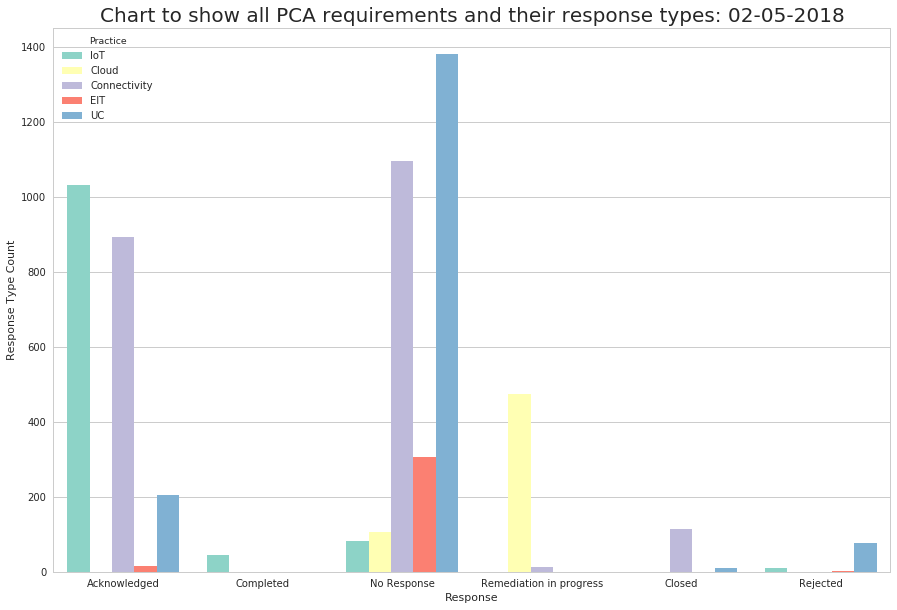

In [743]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=pca_df, ax=ax, x='Response', hue='Practice', saturation=1, palette='Set3')
ax.set_ylabel("Response Type Count")
ax.set_title("Chart to show all PCA requirements and their response types: "+today, size=20)
fig.savefig(OUTPUT_BASE_DIR+"/PCA-Responses-"+today+".png")

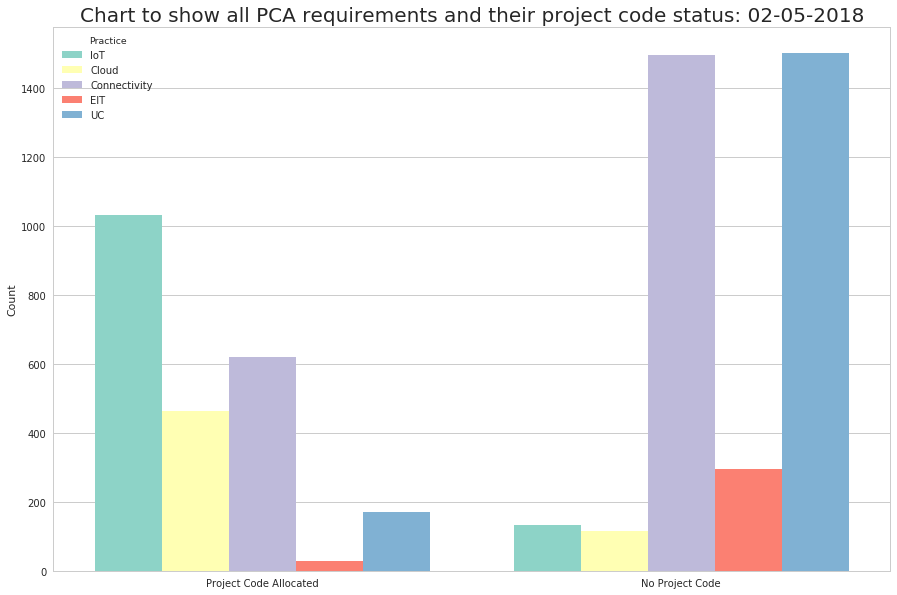

In [744]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=pca_df, ax=ax, x='Orphan', hue='Practice', saturation=1, palette='Set3')
ax.set_ylabel("Count")
ax.set_xlabel("")
ax.set_title("Chart to show all PCA requirements and their project code status: "+today, size=20)
fig.savefig(OUTPUT_BASE_DIR+"/PCA-ProjectCodeStatus-"+today+".png")

In [745]:
COLS = [67,68,89,90,91,94,97,101,102,103,109,110,43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,126,136,141,128,130,129,198,127,1,2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]
INDEX = ['1H','2H','3H','4H','5H','6V','7V','8H','9V','10V','11H','11V','12H','12V','13aH','13aV','13bH','13bV',
'14H','14V','15V','16V','17V','18H','18V','19V','20H','20V','21V','22V','23V','24V','25V','26V','27V','28V','29H',
'30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H','38V','39H','39V','40H','40V','41H','41V','42H',
'42V','43H','43V','44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V',
'55V','56V','57H','57V','58H','59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V',
'70V','71V','72V','73H','74V','75H','76H','76V','77V','78V','79H','79V','80H']


converter = {'7H':'7V', 1: '1H', 2:'2H', 3:'3H', 5:'5H', 7:'7V', 9:'9V', 11:'11V', 12:'12V', 14:'14V', 15:'15V', 16:'16V',
             17:'17V', 18:'18V', 19:'19V', 20:'20V', 21:'21V', 22:'22V', 23:'23V', 26:'26V', 27:'27V', 28:'28V', 30:'30H', 
             31:'31H', 32:'32V', 35:'35H', 37:'37V', 38:'38V', 40:'40V', 41:'41V', 42:'42V', 43:'43H', 44:'44V', 45:'45V', 46:'46V', 
             47:'47V', 48: '48V', 49: '49V', 50:'50H', 51:'51V', 54:'54V', 57:'57V', 58:'58H', 59:'59V', 60:'60H', 61:'61V', 62:'62V', 63:'63H', 
             66:'66H', 67:'67H', 69:'69V', 70:'70V', 73:'73H', 74:'74V', 75:'75H', 76:'76V', 79:'79V'}

roll_up_converter = {'1H':1, '2H':2, '3H':3, '4H':4, '5H':5, '6V':6, '7V':7, '7H':7, '8H':8, '9V':9, 
                     '10V':10, '11H':11, '11V':11, '12H':12, '12V':12, '13aH':13, '13aV':13,
                     '13bH':13, '13bV':13, '14H':14, '14V':14, '15V':15,'16V':16, '17V':17, 
                     '18H':18, '18V':18, '19V':19, '20H':20, '20V':20, '21V':21, '22V':22, 
                     '23V':23, '24V':24, '25V':25, '26V':26, '27V':27, '28V':28, '29H':29,
                     '30H':30, '31H':31, '32H':32, '32V':32, '33V':33, '34V':34, '35H':35, '36H':36, 
                     '37H':37, '37V':37, '38H':38, '38V':38, '39H':39, '39V':39, '40H':40,
                     '40V':40, '41H':41, '41V':41, '42H':42, '42V':42, '43H':43, '43V':43, '44V':44,
                     '45V':45, '46H':46, '46V':46, '47H':47, '47V':47, '48H':48, '48V':48,
                     '49H':49, '49V':49, '50H':50, '51V':51, '52H':52, '52V':52, '53V':53,
                     '54V':54, '55V':55, '56V':56, '57H':57, '57V':57, '58H':58, '59V':59,
                     '60H':60, '61H':61, '61V':61, '62H':62, '62V':62, '63H':63, '64H':64,
                     '65H':65, '66H':66, '67H':67, '68H':68, '69H':69, '69V':69, '70V':70,
                     '71V':71, '72V':72, '73H':73, '74V':74, '75H':75, '76H':76, '76V':76,
                     '77V':77, '78V':78, '79H':79, '79V':79, '80H':80}


In [746]:
heatmap_df = pd.DataFrame(columns=COLS, index=INDEX)
heatmap_df = heatmap_df[[67,68,89,90,91,94,97,101,102,103,109,110,
                         43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,
                         10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,
                         126,136,141,128,130,129,198,127,1,
                         2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]]

In [747]:
SCA_INDEX = ['9.2.1-A',
'9.2.2',
'9.2.3',
'9.2.5',
'9.2.6-A',
'9.2.6-B',
'9.4.1',
'9.4.2',
'12.4.1',
'12.4.3',
'13.1.1-R',
'13.2.1',
'13.2.2',
'14.1.2',
'18.1.4']


sca_heatmap_df = pd.DataFrame(columns=COLS, index=SCA_INDEX)
sca_heatmap_df = sca_heatmap_df[[67,68,89,90,91,94,97,101,102,103,109,110,
                                 43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,
                                 10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,
                                 126,136,141,128,130,129,198,127,1,
                                 2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]]

In [748]:
pca_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT      2812
NON-COMPLIANT            1583
PARTIALLY COMPLIANT f     678
PARTIALLY COMPLIANT       335
NON-COMPLIANT f           263
N/A                       112
NON-COMPLIANT              58
FULLY COMPLIANT            14
Name: Compliance Assessment, dtype: int64

In [749]:
pca_df['Compliance Assessment'].fillna('UNKNOWN', inplace=True)

In [750]:
#pca_df[pca_df['Product ID'] == 22]
pca_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT      2812
NON-COMPLIANT            1583
PARTIALLY COMPLIANT f     678
PARTIALLY COMPLIANT       335
NON-COMPLIANT f           263
N/A                       112
NON-COMPLIANT              58
FULLY COMPLIANT            14
Name: Compliance Assessment, dtype: int64

In [751]:
pca_baseline.head()

Product ID,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1,3,4,3,3,3,3,3,3,3,3,...,5,2,4,4,5,5,2,2,2,5
2,4,4,4,4,4,4,3,4,4,4,...,5,2,4,4,5,4,2,2,2,3
3,4,2,3,2,2,3,2,4,2,5,...,2,1,3,3,1,2,1,1,1,1
4,2,3,5,5,5,5,5,5,5,5,...,3,2,3,3,3,3,2,2,2,5
5,3,3,3,4,3,3,4,3,3,3,...,3,2,3,3,4,3,2,2,3,3


## Set the target heatmap the same as the previous baseline

In [752]:
#pca_df['Req Ref'].str.slice(11, -2)
heatmap_df.fillna('N/A',inplace=True)

for col in heatmap_df.columns:
    for row in heatmap_df.index:
        heatmap_df.loc[row][col] = pca_baseline.loc[int(row.strip('HVab'))][col]

heatmap_df.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,3,4,3,3,3,3,3,3,3,3,...,5,2,4,4,5,5,2,2,2,5
2H,4,4,4,4,4,4,3,4,4,4,...,5,2,4,4,5,4,2,2,2,3
3H,4,2,3,2,2,3,2,4,2,5,...,2,1,3,3,1,2,1,1,1,1
4H,2,3,5,5,5,5,5,5,5,5,...,3,2,3,3,3,3,2,2,2,5
5H,3,3,3,4,3,3,4,3,3,3,...,3,2,3,3,4,3,2,2,3,3


In [753]:
string = '1H'

In [754]:
pca_baseline.loc[int(row.strip('HVab'))][67]

1

## Update the heatmaps with RS data

In [755]:
iter_count = 0

for p in COLS:
    prod_filter = pca_df['Product ID'] == p
    prod_df = pca_df[prod_filter]
    for r in prod_df['Req Ref']:
        pca = r[11:-2]
        #print("PCA ref: {0}".format(pca))
        if pca in INDEX:
            iter_count = iter_count + 1
            compliance_value = PCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)

            if compliance_value < PCA_COMPLIANCE.get(heatmap_df.loc[pca][p]):
                heatmap_df.loc[pca][p] = compliance_value
                
            # update the rollup heatmap
            if compliance_value < pca_rollup_target.loc[roll_up_converter.get(pca)][p]:
                #if the compliance value is better than the baseline heatmap then update it.
                pca_rollup_target.loc[roll_up_converter.get(pca)][p] = compliance_value
                        
            if compliance_value == 0:
                print("1: Compliance Value: {0}".format(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]))
                sys.exit("EXIT") # using this as an assert.
                
        else:
            if r in converter.keys():
                compliance_value = PCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)

                # update the rollup heatmap
                if compliance_value < pca_rollup_target.loc[roll_up_converter.get(pca)][p]:
                    pca_rollup_target.loc[roll_up_converter.get(pca)][p] = compliance_value
                
                if compliance_value == 0:
                    #print("Compliance Value: {0:s}".format(prod_df[prod_df['Req nr'] == r]['Compliance Assessment'].iloc[0]))
                    sys.exit("EXIT") # using this as an assert.
                    
                if compliance_value < PCA_COMPLIANCE.get(heatmap_df.loc[pca][p]):
                    heatmap_df.loc[pca][p] = compliance_value
                #else:
                    #print("Compliance Value: {0:s}".format(prod_df[prod_df['Req nr'] == r]['Compliance Assessment'].iloc[0]))
                    #print("Heatmap Value: {0:s}".format(heatmap_df.loc[r][p]))
                    #sys.exit("EXIT")
            else:
                print("13: Req nr not in index: {0}".format(pca))
                sys.exit("EXIT")
                    
print("iter_count: {0}".format(iter_count))            

iter_count: 5842


In [756]:
pca_rollup_target.head()

Product ID,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1,3,4,3,3,3,3,3,3,3,3,...,5,2,4,4,5,5,2,2,2,5
2,4,4,4,4,4,4,3,4,4,4,...,5,2,4,4,5,4,2,2,2,3
3,4,2,3,2,2,3,2,4,2,5,...,2,1,3,3,1,2,1,1,1,1
4,2,3,5,5,5,5,5,5,5,5,...,3,2,3,3,3,3,2,2,2,5
5,3,3,3,4,3,3,4,3,3,3,...,3,2,3,3,4,3,2,2,3,3


In [757]:
#prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]

In [758]:
heatmap_df.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,3,4,3,3,3,3,3,3,3,3,...,5,2,4,4,5,5,2,2,2,5
2H,4,4,4,4,4,4,3,4,4,4,...,5,2,4,4,5,4,2,2,2,3
3H,4,2,3,2,2,3,2,4,2,5,...,2,1,3,3,1,2,1,1,1,1
4H,2,3,5,5,5,5,5,5,5,5,...,3,2,3,3,3,3,2,2,2,5
5H,3,3,3,4,3,3,4,3,3,3,...,3,2,3,3,4,3,2,2,3,3


In [759]:
#Create Heatmap for SNS (convert to numbers)
input_heatmap = heatmap_df.copy()
#input_heatmap.fillna('OoS', inplace=True)
#input_heatmap.replace(to_replace='OoS', value=0, inplace=True)
#input_heatmap.replace(to_replace='N/A', value=PCA_COMPLIANCE.get('N/A'), inplace=True)
#input_heatmap.replace(to_replace='FULLY COMPLIANT', value=PCA_COMPLIANCE.get('FULLY COMPLIANT'), inplace=True)
#input_heatmap.replace(to_replace='FULLY COMPLIANT ', value=PCA_COMPLIANCE.get('FULLY COMPLIANT '), inplace=True)
#input_heatmap.replace(to_replace='PARTIALLY COMPLIANT f', value=PCA_COMPLIANCE.get('PARTIALLY COMPLIANT f'), inplace=True)
#input_heatmap.replace(to_replace='PARTIALLY COMPLIANT', value=PCA_COMPLIANCE.get('PARTIALLY COMPLIANT'), inplace=True)
#input_heatmap.replace(to_replace='PARTIALLY COMPLIANT ', value=PCA_COMPLIANCE.get('PARTIALLY COMPLIANT '), inplace=True)
#input_heatmap.replace(to_replace='NON-COMPLIANT f', value=PCA_COMPLIANCE.get('NON-COMPLIANT f'), inplace=True)
#input_heatmap.replace(to_replace='NON-COMPLIANT', value=PCA_COMPLIANCE.get('NON-COMPLIANT'), inplace=True)
#input_heatmap.replace(to_replace='NON-COMPLIANT ', value=PCA_COMPLIANCE.get('NON-COMPLIANT '), inplace=True)

#input_heatmap.fillna('N/A', inplace=True)

#for key in PCA_COMPLIANCE.keys():
#    input_heatmap.replace(key, value=PCA_COMPLIANCE.get(key), inplace=True)


In [760]:
input_heatmap

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,3,4,3,3,3,3,3,3,3,3,...,5,2,4,4,5,5,2,2,2,5
2H,4,4,4,4,4,4,3,4,4,4,...,5,2,4,4,5,4,2,2,2,3
3H,4,2,3,2,2,3,2,4,2,5,...,2,1,3,3,1,2,1,1,1,1
4H,2,3,5,5,5,5,5,5,5,5,...,3,2,3,3,3,3,2,2,2,5
5H,3,3,3,4,3,3,4,3,3,3,...,3,2,3,3,4,3,2,2,3,3
6V,3,3,3,4,4,2,3,3,4,4,...,3,3,3,3,3,3,3,3,2,3
7V,3,3,3,4,4,3,3,3,1,4,...,3,2,1,1,1,1,2,2,2,1
8H,2,1,1,1,1,1,2,1,2,4,...,1,2,1,1,1,1,1,2,2,1
9V,3,1,1,4,2,1,3,4,1,4,...,4,2,1,1,1,4,3,2,1,1
10V,1,1,3,3,2,2,3,4,2,4,...,3,2,1,4,3,3,3,2,2,4


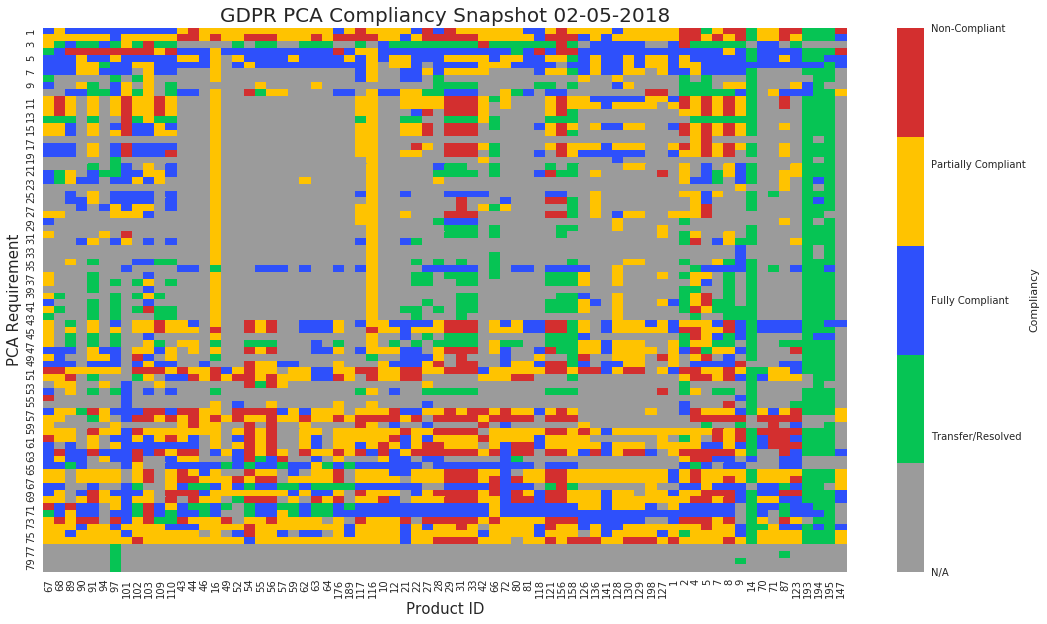

In [761]:
f, ax = plt.subplots(figsize=(18, 10))
#f.colorbar
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])
zx = sns.heatmap(pca_rollup_target, ax=ax, square=False, cmap=cmap, yticklabels='auto', cbar_kws={"orientation": "vertical","label": "Compliancy"})
title = "GDPR PCA Compliancy Snapshot "+today
plt.title(title, size=20)
plt.xlabel('Product ID', size=15)
plt.ylabel('PCA Requirement', size=15)
cbar = zx.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/PCA-Compliancy-Heatmap-"+today+".png")

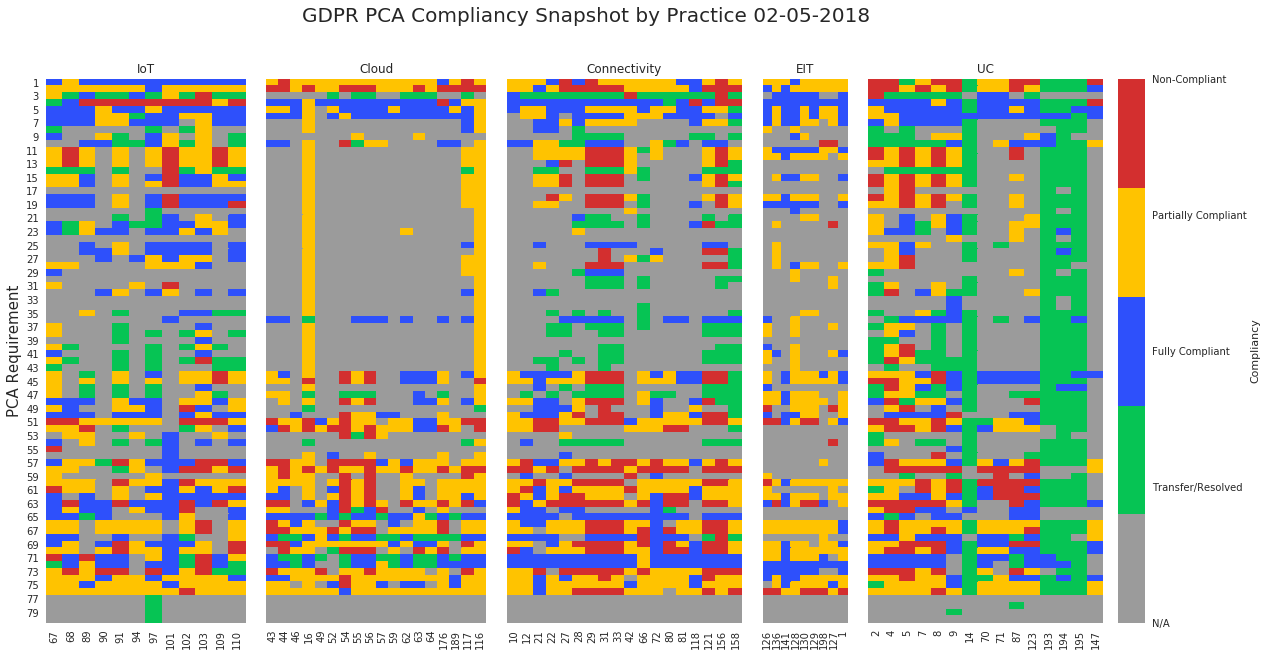

In [762]:
# create subplots
pca_rollup_target.columns.name = ""

baseline_iot_heatmap = pca_rollup_target[iot_cols]
baseline_cloud_heatmap = pca_rollup_target[cloud_cols]
baseline_connectivity_heatmap = pca_rollup_target[connectivity_cols]
baseline_eit_heatmap = pca_rollup_target[eit_cols]
baseline_uc_heatmap = pca_rollup_target[uc_cols]

f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

#cmap=mcolors.ListedColormap(['#9B9B9B',
#                             '#06C454',
#                             '#2E50FB',
#                             '#FFC300',
#                             '#C70039'])
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])


title = "GDPR PCA Compliancy Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(baseline_iot_heatmap, ax=ax, square=False, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('PCA Requirement', size=15)

zx1 = sns.heatmap(baseline_cloud_heatmap, ax=ax1, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(baseline_connectivity_heatmap, ax=ax2, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(baseline_eit_heatmap, ax=ax3, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(baseline_uc_heatmap, ax=ax4, square=False, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')

cbar = zx4.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/Baseline-Per-Practice-Heatmap-"+today+".png")

In [763]:
input_heatmap.fillna(1,inplace=True)
input_heatmap
output_writer = pd.ExcelWriter('./dump.xlsx')
input_heatmap.to_excel(output_writer, 'heatmap')
output_writer.save()

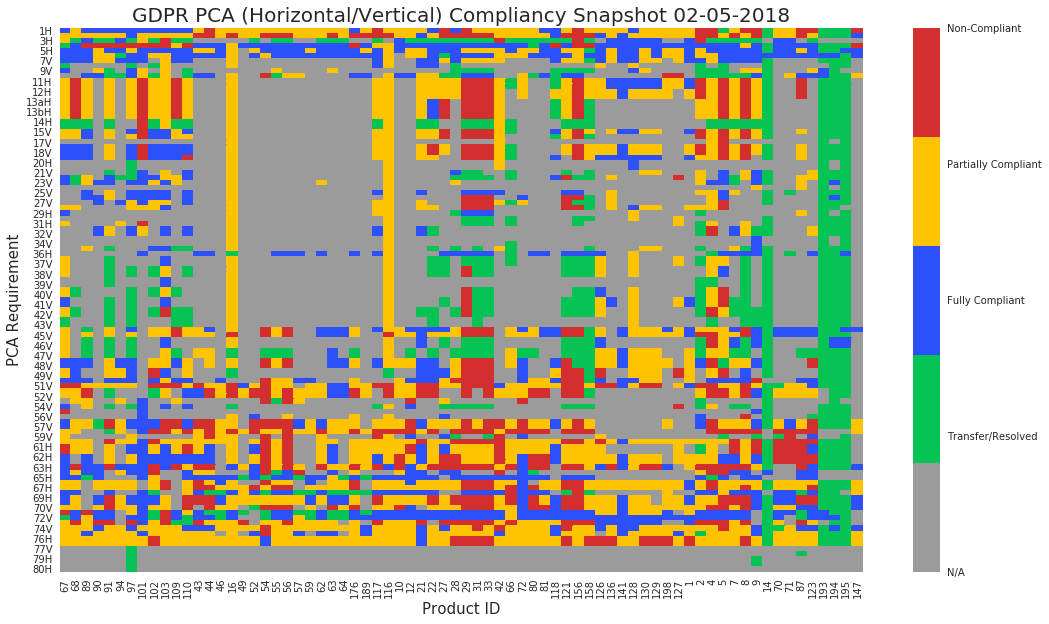

In [764]:
f, ax = plt.subplots(figsize=(18, 10))
#f.colorbar
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])

zx = sns.heatmap(input_heatmap, ax=ax, square=False, cmap=cmap)
title = "GDPR PCA (Horizontal/Vertical) Compliancy Snapshot "+today
plt.title(title, size=20)
plt.xlabel('Product ID', size=15)
plt.ylabel('PCA Requirement', size=15)
cbar = zx.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

In [765]:
f.savefig(OUTPUT_BASE_DIR+"/HV-Breakdown-Compliancy-Heatmap-"+today+".png")

In [766]:
# create subplots
iot_heatmap = input_heatmap[iot_cols]
cloud_heatmap = input_heatmap[cloud_cols]
connectivity_heatmap = input_heatmap[connectivity_cols]
eit_heatmap = input_heatmap[eit_cols]
uc_heatmap = input_heatmap[uc_cols]

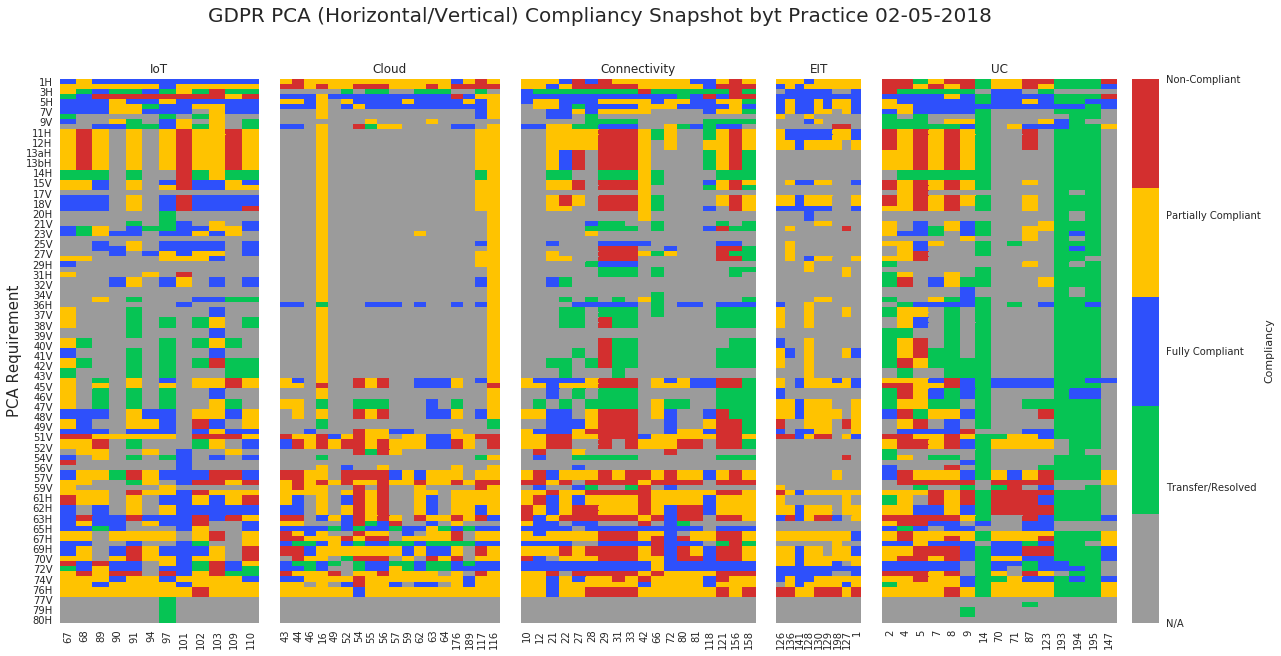

In [767]:
f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])

title = "GDPR PCA (Horizontal/Vertical) Compliancy Snapshot byt Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(iot_heatmap, ax=ax, square=False, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)
#zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, cmap=cmap, cbar=False)
ax.set_title('IoT')
ax.set_ylabel('PCA Requirement', size=15)

zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(connectivity_heatmap, ax=ax2, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(eit_heatmap, ax=ax3, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')


zx4 = sns.heatmap(uc_heatmap, ax=ax4, square=False, cmap=cmap, cbar_kws={"orientation": "vertical","label": "Compliancy"}, xticklabels=True)
ax4.set_title('UC')


#plt.annotate('Something', (0,0))
#plt.xlabel('Product ID', size=15)
#plt.ylabel('PCA Requirement', size=15)

cbar = zx4.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

#f.tight_layout(rect=[0, 0, 0.9, 0.9])

#cbar = zx1.collections[0].colorbar
#cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
#cbar.set_ticklabels(['0:Out of Scope from DPIA',
#                     '1:N/A', 
#                     '2:Fully Compliant', 
#                     '3:Partially Compliant f',
#                     '4:Partially Compliant', 
#                     '5:Non-Compliant f', 
#                     '6:Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/HV-Breakdown-Per-Practice-Heatmap-"+today+".png")

In [768]:
# create burndowns
pca_df.head()

gap_counter = set([

    'PARTIALLY COMPLIANT ',
    'NON-COMPLIANT ',
    'PARTIALLY COMPLIANT f',
    'NON-COMPLIANT',
    'NON-COMPLIANT f',
    'PARTIALLY COMPLIANT']
)


#burndown_df = pd.DataFrame(index=['IoT','Cloud','Connectivity','EIT','UC', 'Total'], columns=[week_num])

#output_writer = pd.ExcelWriter('./burndown.xlsx')
#burndown_df.to_excel(output_writer, 'PCA Burndown')
#output_writer.save()


In [769]:
#start_date = datetime.today()
#end_date = date(2018,6,1)


#end_date.strftime('%d-%m-%Y')
#end_date = end_date + timedelta(days=7)
#end_date.strftime('%d-%m-%Y')

In [770]:
#start_date.strftime('%Y Week %W')

In [771]:
iot_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='IoT'].value_counts()
cloud_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='Cloud'].value_counts()
connectivity_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='Connectivity'].value_counts()
eit_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='EIT'].value_counts()
uc_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='UC'].value_counts()

In [772]:
iot_compliance

PARTIALLY COMPLIANT      768
NON-COMPLIANT            225
PARTIALLY COMPLIANT f    145
NON-COMPLIANT             17
PARTIALLY COMPLIANT       10
Name: Compliance Assessment, dtype: int64

In [773]:
iot_gap = 0
cloud_gap = 0
connectivity_gap = 0
eit_gap = 0
uc_gap = 0

for key in iot_compliance.keys():
    if key in gap_counter:
        iot_gap = iot_gap + iot_compliance[key]

for key in cloud_compliance.keys():
    if key in gap_counter:
        cloud_gap = cloud_gap + cloud_compliance[key]

for key in connectivity_compliance.keys():
    if key in gap_counter:
        connectivity_gap = connectivity_gap + connectivity_compliance[key]

for key in eit_compliance.keys():
    if key in gap_counter:
        eit_gap = eit_gap + eit_compliance[key]

for key in uc_compliance.keys():
    if key in gap_counter:
        uc_gap = uc_gap + uc_compliance[key]

total_gap = iot_gap + cloud_gap + connectivity_gap + eit_gap + uc_gap
print total_gap

5729


In [774]:
#burndown_df.head()

pca_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='PCA Burndown')
pca_burndown_df.columns.name = 'Week #'
pca_burndown_df.head(10)

Week #,2018 Week 18
IoT,1165
Cloud,579
Connectivity,2000
EIT,323
UC,1662
Total,5729


In [775]:
pca_burndown_df[week_num] = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap, total_gap]
pca_burndown_df[week_num]['Total']

5729

In [776]:
list(pca_burndown_df.loc['Total'])

[5729]

In [777]:
pca_burndown_df.head(10)

Week #,2018 Week 18
IoT,1165
Cloud,579
Connectivity,2000
EIT,323
UC,1662
Total,5729


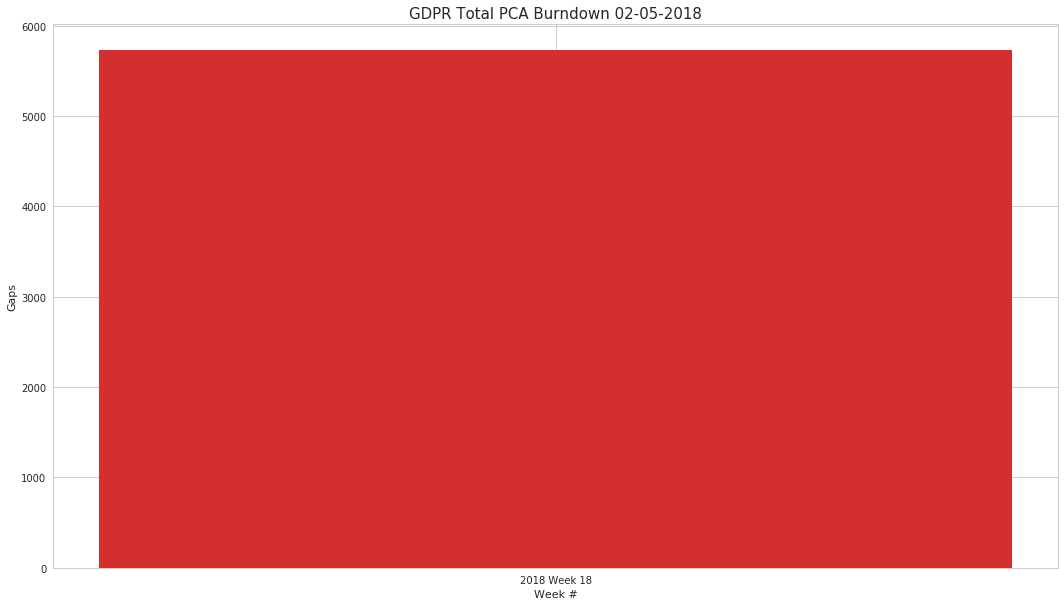

In [778]:
f, ax = plt.subplots(figsize=(18, 10))
bars = list(pca_burndown_df.loc['Total'])
xticks = list(pca_burndown_df.columns)

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

x= np.arange(len(bars))

plt.bar(x, bars, color=RED)
plt.xticks(x, xticks)
plt.xlabel("Week #")
plt.ylabel("Gaps")
plt.title("GDPR Total PCA Burndown "+today, size=15)
f.savefig(OUTPUT_BASE_DIR+"/PCA-Burndown-"+today+".png")

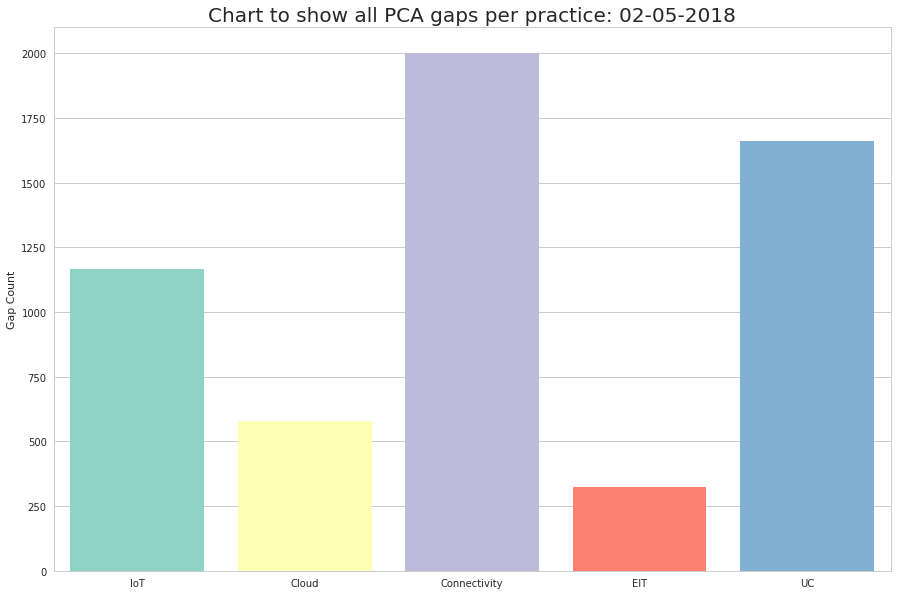

In [779]:
fig, ax = plt.subplots(figsize=(15,10))

x = ['IoT', 'Cloud', 'Connectivity', 'EIT', 'UC']
y = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap]

sns.barplot(x=x, y=y, saturation=1, palette='Set3')

ax.set_ylabel("Gap Count")
#ax.set_xlabel(today)
ax.set_title("Chart to show all PCA gaps per practice: "+today, size=20)
fig.savefig(OUTPUT_BASE_DIR+"/PCA-Burndown-Per-Practice-"+today+".png")

In [780]:
output_writer = pd.ExcelWriter('./burndown.xlsx')
pca_burndown_df.to_excel(output_writer, 'PCA Burndown')
output_writer.save()

In [781]:
#output_writer = pd.ExcelWriter('./burndown.xlsx')
#burndown_df.to_excel(output_writer, 'PCA Burndown')
#output_writer.save()
sca_df.head()

,Compliance Assessment,Entity Count,Filename,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Product ID,Category,Orphan,Practice
27,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007, IOT-016",EPS097-SCA-9.2.6-A-A,9.2.6-A,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-9.2.6-A,97,SCA,Project Code Allocated,IoT
28,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007, IOT-016",EPS097-SCA-9.2.6-B-A,9.2.6-B,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-9.2.6-B,97,SCA,Project Code Allocated,IoT
29,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-007, (IOT-012)",EPS097-SCA-12.4.3-A,12.4.3,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-12.4.3,97,SCA,Project Code Allocated,IoT
30,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-003, IOT-004, IOT-015, (IOT-008)",EPS097-SCA-13.2.1-A,13.2.1,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-13.2.1,97,SCA,Project Code Allocated,IoT
31,3 - Partially adequate / Minor Non-Conformity ...,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,"IOT-001, IOT-007, IOT-014, IOT-015, (IOT-008),...",EPS097-SCA-18.1.4-A,18.1.4,Acknowledged,Confirmed by Tim Snape,EPS097-SCA-18.1.4,97,SCA,Project Code Allocated,IoT


In [782]:
for p in COLS:
    prod_filter = sca_df['Product ID'] == p
    prod_df = sca_df[prod_filter]
    
    for r in prod_df['Req Ref']:
        sca = r[11:-2]
        if sca in SCA_INDEX:
            compliance_value = SCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)

            if SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0) <= compliance_value:
                sca_heatmap_df.loc[sca][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
            else:
                print("2: Compliance Value: {0:s}".format(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]))
                print("2: Heatmap Value: {0}".format(sca_heatmap_df.loc[sca][p]))
                sys.exit("EXIT")
            
            #print r
            #print heatmap_df.loc[r][p]
        else:
            if sca in converter.keys():
                sca_heatmap_df.loc[converter.get(sca)][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
            else:
                print("Req nr not in index: {0}".format(r))
                if sca == 13:
                    sca_heatmap_df.loc['13aV'][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
                    sca_heatmap_df.loc['13bV'][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
                    
            

In [783]:
sca_heatmap_df

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,NaN,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,NaN,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,NaN,3 - Partially adequate / Minor Non-Conformity ...,NaN,4 - Broadly adequate / Observation,NaN,4 - Broadly adequate / Observation
9.2.2,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,NaN,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,3 - Partially adequate / Minor Non-Conformity ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 - Broadly adequate / Observation
9.2.3,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,NaN,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,4 - Broadly adequate / Observation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 - Broadly adequate / Observation
9.2.5,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,NaN,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,NaN,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,NaN,4 - Broadly adequate / Observation,NaN,4 - Broadly adequate / Observation
9.2.6-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,NaN,2 - Inadequate / Minor Non-Conformity (high se...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,2 - Inadequate / Minor Non-Conformity (high se...,NaN,NaN,2 - Inadequate / Minor Non-Conformity (high se...,NaN,4 - Broadly adequate / Observation,NaN,4 - Broadly adequate / Observation
9.2.6-B,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,NaN,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,...,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,NaN,2 - Inadequate / Minor Non-Conformity (high se...,NaN,4 - Broadly adequate / Observation,NaN,4 - Broadly adequate / Observation
9.4.1,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,3 - Partially adequate / Mi

In [784]:
COLUMNS = ['PRIVACY_REQUIREMENT_CONTENT', 'REQ_NO', 'VERTICAL', 'HORIZONTAL', 'HYBRID', 'PC', 'NC']

INDEX = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

set_a = set(['1H','2H','3H'])
set_b = set(['4H','5H','6V','7V','8H'])
set_c = set(['9V','10V'])
set_d = set(['11H','11V','12H','12V','13aH','13aV','13bH','13bV','14H','14V','15V','16V','17V','18H','18V','19V','20H','20V'])
set_e = set(['21V','22V','23V','24V','25V','26V','27V','28V','29H','30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H',
             '38V','39H','39V','40H','40V','41H','41V','42H','42V','43H','43V'])
set_f = set(['44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V','55V','56V','57H','57V','58H'])
set_g = set(['59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V','70V','71V','72V','73H'])
set_h = set(['74V','75H','76H','76V','77V'])
set_i = set(['78V','79H','79V','80H'])

requirement_content = ['Define privacy responsibilities, document the data being processed, \
conduct privacy risk assessments and control identification (Privacy by Design), and ensure business accountability \
for implementation of controls and residual risks',
                      'Collection and purpose limitation',
                      'Protect confidentiality of communications and sensitive information',
                      'Provide a clear and understandable privacy notice',
                      'Obtain and manage necessary permissions for processing communications content, \
                      traffic data, location data, marketing, analytics and processing of sensitive data',
                      'Manage data diligently to maintain its accuracy and quality across product life cycle, not \
                      retain data for longer than is necessary and ensure rights and obligations related to data carry \
                      over to all instances of data',
                      'Design product to enable data subject’s right to access data, request deletion and data portability',
                      'Do not disclose personal data to unauthorized governmental agencies and ensure suppliers comply with \
                      Vodafone privacy and security requirements',
                      'Apply effective technical and organisational controls to protect personal data against unauthorized access, \
                      use, disclosure, modification or loss ',
                      'Acquire parental consents when providing information society services (online services) directly to children, use child appropriate language, \
                      avoid profiling of children and protect child personal data against unwanted disclosure']

vertical = [15, ]

all_risk_df = pd.DataFrame(columns=COLUMNS, index=INDEX)

all_risk_df['PRIVACY_REQUIREMENT_CONTENT'] = requirement_content

In [785]:
PCA_COMPLIANCE_INVERSE.get(input_heatmap.loc['1H'][67])

'FULLY COMPLIANT'

In [786]:
all_risk_df

,PRIVACY_REQUIREMENT_CONTENT,REQ_NO,VERTICAL,HORIZONTAL,HYBRID,PC,NC
A,"Define privacy responsibilities, document the ...",NaN,NaN,NaN,NaN,NaN,NaN
B,Collection and purpose limitation,NaN,NaN,NaN,NaN,NaN,NaN
C,Protect confidentiality of communications and ...,NaN,NaN,NaN,NaN,NaN,NaN
D,Provide a clear and understandable privacy notice,NaN,NaN,NaN,NaN,NaN,NaN
E,Obtain and manage necessary permissions for pr...,NaN,NaN,NaN,NaN,NaN,NaN
F,Manage data diligently to maintain its accurac...,NaN,NaN,NaN,NaN,NaN,NaN
G,Design product to enable data subject’s right ...,NaN,NaN,NaN,NaN,NaN,NaN
H,Do not disclose personal data to unauthorized ...,NaN,NaN,NaN,NaN,NaN,NaN
I,Apply effective technical and organisational c...,NaN,NaN,NaN,NaN,NaN,NaN
J,Acquire parental consents when providing infor...,NaN,NaN,NaN,NaN,NaN,NaN


In [787]:
sca_heatmap_df.replace(to_replace='0 - n/a', value=0, inplace=True)
sca_heatmap_df.replace(to_replace='1 - Very Inadequate / Major Non-Conformity', value=1, inplace=True)
sca_heatmap_df.replace(to_replace='2 - Inadequate / Minor Non-Conformity (high severity)', value=2, inplace=True)
sca_heatmap_df.replace(to_replace='3 - Partially adequate / Minor Non-Conformity (low severity)', value=3, inplace=True)
sca_heatmap_df.replace(to_replace='4 - Broadly adequate / Observation', value=4, inplace=True)
sca_heatmap_df.replace(to_replace='5 - Substantially adequate / Compliant', value=5, inplace=True)

sca_heatmap_df.fillna(0, inplace=True)

sca_heatmap_df

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3.0,3.0,3.0,0.0,3.0,4.0,4.0,4.0,4.0,4.0,...,0.0,4.0,3.0,4.0,0.0,3.0,0.0,4.0,0.0,4
9.2.2,3.0,3.0,3.0,0.0,3.0,4.0,4.0,4.0,4.0,4.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
9.2.3,3.0,3.0,3.0,0.0,2.0,4.0,4.0,4.0,4.0,4.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
9.2.5,3.0,3.0,3.0,0.0,2.0,4.0,4.0,4.0,4.0,4.0,...,2.0,4.0,3.0,0.0,4.0,3.0,0.0,4.0,0.0,4
9.2.6-A,3.0,3.0,3.0,0.0,2.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,2.0,0.0,0.0,2.0,0.0,4.0,0.0,4
9.2.6-B,3.0,3.0,3.0,0.0,2.0,4.0,3.0,3.0,3.0,3.0,...,3.0,4.0,2.0,4.0,0.0,2.0,0.0,4.0,0.0,4
9.4.1,4.0,4.0,3.0,0.0,3.0,4.0,4.0,4.0,4.0,4.0,...,0.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,4
9.4.2,4.0,4.0,3.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,0.0,4
12.4.1,4.0,4.0,3.0,0.0,2.0,4.0,4.0,4.0,4.0,4.0,...,1.0,4.0,4.0,0.0,4.0,4.0,0.0,3.0,0.0,4
12.4.3,4.0,4.0,3.0,0.0,2.0,4.0,3.0,3.0,3.0,3.0,...,2.0,4.0,4.0,0.0,4.0,4.0,0.0,3.0,0.0,4


# Build SCA Heatmaps

In [788]:
#SCA Heatmaps
# create subplots
sca_heatmap_df.columns.name = " "

iot_sca_heatmap_df = sca_heatmap_df[iot_cols]
cloud_sca_heatmap_df = sca_heatmap_df[cloud_cols]
connectivity_sca_heatmap_df = sca_heatmap_df[connectivity_cols]
eit_sca_heatmap_df = sca_heatmap_df[eit_cols]
uc_sca_heatmap_df = sca_heatmap_df[uc_cols]



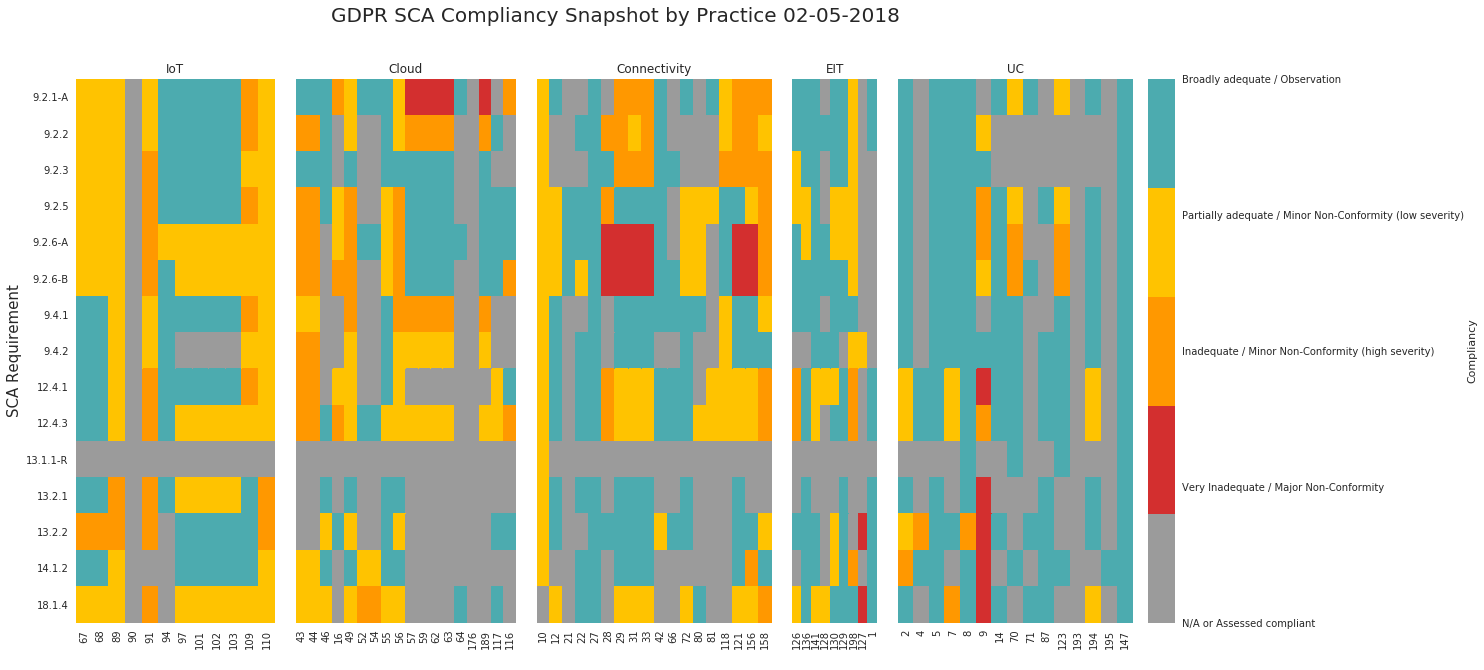

In [798]:
f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

#cmap=mcolors.ListedColormap(['#9B9B9B',
#                             '#06C454',
#                             '#2E50FB',
#                             '#FFC300',
#                             '#C70039'])
cmap=mcolors.ListedColormap([GREY,
                             RED,
                             '#FF9800',
                             AMBER,
                             '#4CABAF'])


title = "GDPR SCA Compliancy Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(iot_sca_heatmap_df, ax=ax, square=False, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('SCA Requirement', size=15)

zx1 = sns.heatmap(cloud_sca_heatmap_df, ax=ax1, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(connectivity_sca_heatmap_df, ax=ax2, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(eit_sca_heatmap_df, ax=ax3, square=False, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(uc_sca_heatmap_df, ax=ax4, square=False, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')

cbar = zx4.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4])
cbar.set_ticklabels(['N/A or Assessed compliant',
                     'Very Inadequate / Major Non-Conformity',
                     'Inadequate / Minor Non-Conformity (high severity)', 
                     'Partially adequate / Minor Non-Conformity (low severity)', 
                     'Broadly adequate / Observation'])

#f.savefig(OUTPUT_BASE_DIR+"/Baseline-Per-Practice-Heatmap-"+today+".png")

In [790]:
#convert back
sca_heatmap_df.replace(to_replace=0, value=SCA_COMPLIANCE_INVERSE.get(0), inplace=True)
sca_heatmap_df.replace(to_replace=1, value=SCA_COMPLIANCE_INVERSE.get(1), inplace=True)
sca_heatmap_df.replace(to_replace=2, value=SCA_COMPLIANCE_INVERSE.get(2), inplace=True)
sca_heatmap_df.replace(to_replace=3, value=SCA_COMPLIANCE_INVERSE.get(3), inplace=True)
sca_heatmap_df.replace(to_replace=4, value=SCA_COMPLIANCE_INVERSE.get(4), inplace=True)
sca_heatmap_df.replace(to_replace=5, value=SCA_COMPLIANCE_INVERSE.get(5), inplace=True)

heatmap_df.replace(to_replace=1, value=PCA_COMPLIANCE_INVERSE.get(1), inplace=True)
heatmap_df.replace(to_replace=2, value=PCA_COMPLIANCE_INVERSE.get(2), inplace=True)
heatmap_df.replace(to_replace=3, value=PCA_COMPLIANCE_INVERSE.get(3), inplace=True)
heatmap_df.replace(to_replace=4, value=PCA_COMPLIANCE_INVERSE.get(4), inplace=True)
heatmap_df.replace(to_replace=5, value=PCA_COMPLIANCE_INVERSE.get(5), inplace=True)

pca_rollup_target.replace(to_replace=1, value=PCA_COMPLIANCE_INVERSE.get(1), inplace=True)
pca_rollup_target.replace(to_replace=2, value=PCA_COMPLIANCE_INVERSE.get(2), inplace=True)
pca_rollup_target.replace(to_replace=3, value=PCA_COMPLIANCE_INVERSE.get(3), inplace=True)
pca_rollup_target.replace(to_replace=4, value=PCA_COMPLIANCE_INVERSE.get(4), inplace=True)
pca_rollup_target.replace(to_replace=5, value=PCA_COMPLIANCE_INVERSE.get(5), inplace=True)

output_writer = pd.ExcelWriter(OUTPUT_BASE_DIR+'/GDPR-SNAPSHOT-Week'+week+'-'+today+'.xlsx')
heatmap_df.to_excel(output_writer, 'PCA Baseline')
pca_rollup_target.to_excel(output_writer, 'PCA Rollup Baseline')
sca_heatmap_df.to_excel(output_writer, 'SCA Baseline')
pca_df.to_excel(output_writer, 'PCA Data Table')
sca_df.to_excel(output_writer, 'SCA Data Table')
output_writer.save()

# Create HTML Heatmap